# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### загрузим данные и изучим их

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date', parse_dates=True)
display(df_train.head())
df_train.info()


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

Дату можно удалить из данных так как она ни как не повлияет на обудение модели. Наблюдаем много показателей с пропусками. 

In [2]:
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', parse_dates=True, index_col='date')
display(df_test.head())
df_test.info()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

Также надо избавиться от пропусков.

In [3]:
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', parse_dates=True, index_col='date')
display(df_full.head())
df_full.info()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

Количество показателей разное и следовательно чтобы модель обучилась правильно нам следует использовать только те данные котторые есть в тестовой выборке.

### расчитаем эффективность обогащения и сравним ее с данными в 'rougher.output.recovery'

In [4]:
df_train['rougher.output.recovery.test'] = (
    df_train['rougher.output.concentrate_au']*
    (df_train['rougher.input.feed_au']-
     df_train['rougher.output.tail_au']))/(
    (df_train['rougher.input.feed_au']*
    (df_train['rougher.output.concentrate_au']-
    df_train['rougher.output.tail_au'])))*100
print(df_train['rougher.output.recovery.test'].mean()-df_train['rougher.output.recovery'].mean())


0.0


найдем MAE эффективности обогащения для расчитанной и исходной выборки

In [5]:
print(mean_absolute_error(df_train['rougher.output.recovery.test'], df_train['rougher.output.recovery']))

9.73512347450521e-15


Получается что среднее отклонение от расчитанного значения 9,73 в -15 степени % что весьма мало. Отлично, значит данные верные.

### Подготовка данных

В тестовой выборке отсутствуют некоторые признаки обучающей выборки, посмотрим на них

In [6]:
set(df_train) - set(df_test)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.recovery.test',
 'rougher.output.tail_ag',
 'rougher.out

* `final.output._` финальная концентрация на выходе понятно почему их нет в тестовой выборке так как это и будет целевыми данными для модели
* `primary_cleaner.output` и `secondary_cleaner.output` показатели после первой очистки, промежуточные данные которые на влияют на работу модели
* `rougher.calculation` расчетные значения показателей соотношения так же не повлияют на работу модели
* `rougher.output` данные после грубой очистки как и после первой очистки тоже являются промежуточными


### Подготовка данных

Создадим выборку из обучающих признаков которые имеются в тестовой выборке

In [7]:
columns_drop = set(df_train) - set(df_test)
df_train_features = df_train.drop(columns_drop, axis=1)

df_train_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               14129 non-null  float64
 1   primary_cleaner.input.depressant            14117 non-null  float64
 2   primary_cleaner.input.feed_size             14149 non-null  float64
 3   primary_cleaner.input.xanthate              14049 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      14145 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    14148 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      14147 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    1414

Заполним пропуски предыдущим значением.

In [8]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14149 non-null  float64
 7   final.output.tail_sol                               14149 non-null  float64
 8   final.output.tail_au                     

In [9]:
df_full_merged = df_full[["rougher.output.recovery", "final.output.recovery", "rougher.output.concentrate_au", "rougher.output.concentrate_ag", "rougher.output.concentrate_pb", "rougher.output.concentrate_sol", "final.output.concentrate_au", "final.output.concentrate_ag", "final.output.concentrate_pb", "final.output.concentrate_sol"]]
df_test = df_test.merge(df_full_merged, on="date", how="left")
df_full_merged = df_full_merged.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [10]:
columns_list = df_train_features.columns
columns_target = ['rougher.output.recovery', 'final.output.recovery']
df_train_features = df_train_features.fillna(df_train_features.mean())
df_train_features.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               14149 non-null  float64
 1   primary_cleaner.input.depressant            14149 non-null  float64
 2   primary_cleaner.input.feed_size             14149 non-null  float64
 3   primary_cleaner.input.xanthate              14149 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      14149 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    14149 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      14149 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    14149 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      14149 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    1414

создадим тестовую целевую выборку из полного дата сета

In [11]:
target_for_test = df_full[['rougher.output.recovery', 'final.output.recovery']].loc[df_test.index]
target_for_test

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01 00:59:59,89.993421,70.273583
2016-09-01 01:59:59,88.089657,68.910432
2016-09-01 02:59:59,88.412756,68.143213
2016-09-01 03:59:59,87.360133,67.776393
2016-09-01 04:59:59,83.236367,61.467078
...,...,...
2017-12-31 19:59:59,95.172585,68.919891
2017-12-31 20:59:59,94.575036,68.440582
2017-12-31 21:59:59,93.018138,67.092759


## Анализ данных

### Проверим распределение содержания золота серебра и свицка на всех этапах

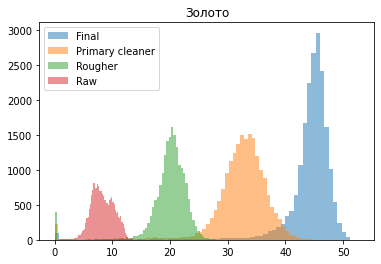

In [12]:
def distribution(final, primary, rougher, raw, name):
    plt.hist(final, bins=70, alpha=0.5, label='Final')
    plt.hist(primary, bins=70, alpha=0.5, label='Primary cleaner')
    plt.hist(rougher, bins=70, alpha=0.5, label='Rougher')
    plt.hist(raw, bins=70, alpha=0.5, label='Raw')
    plt.title(name)
    plt.legend()
    plt.show()
# Распределение золота
distribution(df_full['final.output.concentrate_au'],
             df_full['primary_cleaner.output.concentrate_au'],
             df_full['rougher.output.concentrate_au'],
             df_full['rougher.input.feed_au'], 'Золото')


Распределение близко к нормальному только с длинным левым хвостом.
Наблюдается выбросы в 0 значении.

С каждым этапом процент содержания золота растет.


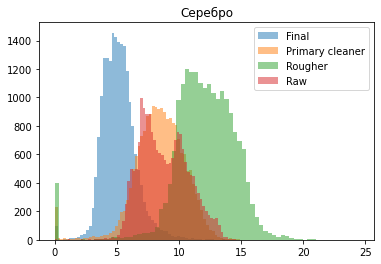

In [13]:
# Распределение серебра
distribution(df_full['final.output.concentrate_ag'],
             df_full['primary_cleaner.output.concentrate_ag'],
             df_full['rougher.output.concentrate_ag'],
             df_full['rougher.input.feed_ag'], 'Серебро')


В изходном материале распределения количества серебра отличается от нормального. После очистки близко к нормальному.
Также наблюдается выбросы в 0 значении.

После финальной очистки количество содержания серебра снижается до 5.

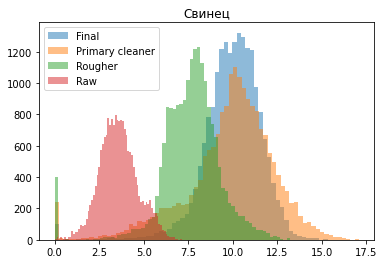

In [14]:
# Распределение свинца
distribution(df_full['final.output.concentrate_pb'],
             df_full['primary_cleaner.output.concentrate_pb'],
             df_full['rougher.output.concentrate_pb'],
             df_full['rougher.input.feed_pb'], 'Свинец')


Распределение близко к нормальному.
Также наблюдается выбросы в 0 значении.

После финальной очистки количество содержания свинца увеличивается.

### Проверим распределение размера гранул на разных этапах

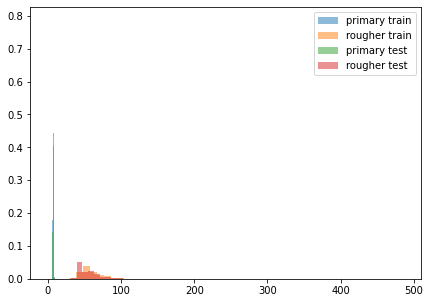

In [15]:
plt.figure(figsize=(7, 5))
plt.hist(df_train['primary_cleaner.input.feed_size'], bins=50, alpha=0.5, label='primary train')
plt.hist(df_train['rougher.input.feed_size'], bins=50, alpha=0.5, label='rougher train')
plt.hist(df_test['primary_cleaner.input.feed_size'], bins=50, alpha=0.5, label='primary test')
plt.hist(df_test['rougher.input.feed_size'], bins=50, alpha=0.5, label='rougher test')
plt.legend()
plt.show();

* Как видим после первичной очистки практически все гранулы в одном размере. 
* И в обучающей и в тестовой выборках форма распределения схожи.

### Проанализируем данные
Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

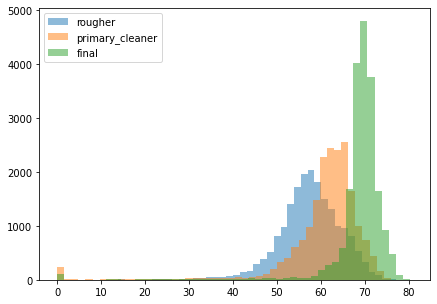

In [16]:
rougher = df_full['rougher.input.feed_au']+df_full['rougher.input.feed_ag']+\
    df_full['rougher.input.feed_pb']+df_full['rougher.input.feed_sol']
primary_cleaner = df_full['primary_cleaner.output.concentrate_ag']+\
    df_full['primary_cleaner.output.concentrate_pb']+\
    df_full['primary_cleaner.output.concentrate_au']+\
    df_full['primary_cleaner.output.concentrate_sol']
final = df_full['final.output.concentrate_ag']+df_full['final.output.concentrate_pb']+\
    df_full['final.output.concentrate_au']+df_full['final.output.concentrate_sol']
plt.figure(figsize=(7, 5))
plt.hist(rougher, bins=50, alpha=0.5, label='rougher')
plt.hist(primary_cleaner, bins=50, alpha=0.5, label='primary_cleaner')
plt.hist(final, bins=50, alpha=0.5, label='final')
plt.legend()
plt.show();

С каждым этапом средняя концентрация возрастает.
Распределение близкое к нормальному что хорошо сказывается на обучении модели.
Наблудаются аномальные выбросы с нулевым значением. От этих данных лучше избавиться.

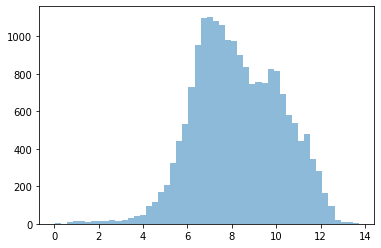

In [17]:
df_train_features = df_train_features.loc[df_train_features['rougher.input.feed_au']>0]
df_test = df_test.loc[df_test['rougher.input.feed_au']>0]
df_full = df_full.loc[df_full['rougher.input.feed_au']>0]
plt.hist(df_full['rougher.input.feed_au'], bins=50, alpha=0.5);

От нулевых значений избавились

## Модель

### Создадим функцию расчета итогового показателя sMAPE

In [18]:
def smape(y, y_pred):
    error = np.abs(y - y_pred)
    scale = (np.abs(y) + np.abs(y_pred)) / 2
    smape = (error / scale).mean()
    return smape



### Выбор модели

In [19]:
features_train = df_train.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)
target_train = df_train[["rougher.output.recovery", "final.output.recovery"]]

features_test = df_test.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)
target_test = df_test[["rougher.output.recovery", "final.output.recovery"]]

smape_scorer = make_scorer(smape, greater_is_better=False)


In [20]:
param_grid = {'max_depth': range(2, 11)}
model = DecisionTreeRegressor(random_state=12345)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train["rougher.output.recovery"])
print('Лучшее значение smape для дерева решений: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))
best_dtr = -search.best_score_

Лучшее значение smape для дерева решений: 0.0006922394604794676 при значениях гиперпараметров: {'max_depth': 10}


In [21]:
def score_CVS(model, features_train,target_train):
    predict = pd.DataFrame()
    model.fit(features_train,target_train['rougher.output.recovery'])
    predict[0] = model.predict(features_train)
    model.fit(features_train,target_train['final.output.recovery'])
    predict[1] = model.predict(features_train)
    
    cross_rougher = cross_val_score(model, features_train, target_train['rougher.output.recovery'],scoring=smape_scorer, cv=10)
    cross_final = cross_val_score(model, features_train, target_train['final.output.recovery'],scoring=smape_scorer, cv=10)
    print('Значение sMAPE_rougher:', '%.3f' % cross_rougher.mean())
    print('Значение sMAPE_final:', '%.3f' % cross_final.mean())
    smape_result = 0.25*abs(cross_rougher.mean()) + 0.75*abs(cross_final.mean())
    return smape_result
model = DecisionTreeRegressor(max_depth=10, random_state=1234)
smape_result = score_CVS(model, features_train,target_train)
print('Итоговое sMAPE дерева решений:','%.3f' % smape_result)

Значение sMAPE_rougher: -0.001
Значение sMAPE_final: -0.053
Итоговое sMAPE дерева решений: 0.040


In [22]:
param_grid = {'max_depth': range(2, 11), 'n_estimators': range(1, 11)}
model = RandomForestRegressor(random_state=12345)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train["rougher.output.recovery"])
print('Лучшее значение smape для случайного леса: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))
best_dtr = -search.best_score_

Лучшее значение smape для случайного леса: 0.0007270223191315077 при значениях гиперпараметров: {'max_depth': 10, 'n_estimators': 2}


In [26]:

# модель случайного леса
model = RandomForestRegressor(random_state=1234, max_depth=10, n_estimators=2)
smape_result = score_CVS(model, features_train,target_train)
print('Итоговое sMAPE случайного леса:','%.3f' % smape_result)

Значение sMAPE_rougher: -0.001
Значение sMAPE_final: -0.054
Итоговое sMAPE случайного леса: 0.041


In [24]:

# модель логистической регрессии
model = LinearRegression()
smape_result = score_CVS(model, features_train,target_train)
print('Итоговое sMAPE логистической регрессии:','%.3f' % smape_result)

Значение sMAPE_rougher: -0.042
Значение sMAPE_final: -0.052
Итоговое sMAPE логистической регрессии: 0.050


Модель Логистической регрессии показала лучшее качество, на ней проверим точность предсказаний

In [25]:
model = LinearRegression()
smape_result = score_CVS(model, features_test,target_test)
print('Итоговое sMAPE логистической регрессии:','%.3f' % smape_result)

Значение sMAPE_rougher: -0.095
Значение sMAPE_final: -0.098
Итоговое sMAPE логистической регрессии: 0.097


**Вывод:**
   - проверив данные эффективности обогощщения с расчетными убедились в достоверности предоставленных данных
   - выяснили что с каждым этапом очистки процент золота растет
   - процент содержания свинца и серебра на разных этапах меняется и на финальном этапе свинца больше чем серебра
   - исследовали 3 модели которые могут предсказать эффективное получение высокого содержания золота
   - минимальные ошибки у модели Дерева решений, ее и предлагаем для использования в прогнозировании